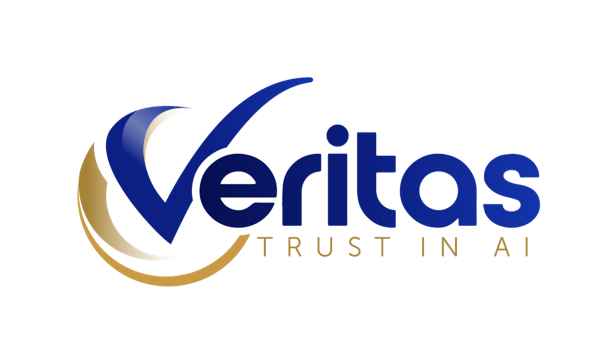

# Veritas Tool : Base Regression Model 
    
<p>   
    The <b>Veritas toolkit</b> is comprised of diagnosis tool and assessment tool.
    This scenario is to build a regression model and use daignosis tool to evaluate model & produce
    the model artifact required by assessment tool to generate the fairness & transparency assessment report.
</p>    
<p>    
    Base regression model is a regression model for prediction of continuous target variable. <br/>
    Steps to perform: <br/>
    1. Loading Data and Model <br/>  
    2. Fairness Diagnosis and Transparency Assessment <br/>
    &nbsp;&nbsp;&nbsp;&nbsp;2.1 compute performance and fairness metrics <br/>
    &nbsp;&nbsp;&nbsp;&nbsp;2.2 compute feature importance analysis <br/>
    &nbsp;&nbsp;&nbsp;&nbsp;2.3 compute transparency analysis <br/>
    &nbsp;&nbsp;&nbsp;&nbsp;2.4 save results in json artifact <br/>
</p>

# 1. Loading Data and Model

## Importing Libraries 

In [1]:
import numpy as np
import pickle
import sys

# making veritas available in search path
sys.path.append("../../")
import os

%load_ext autoreload
%autoreload 2

## Loading Data

In [2]:
pth = "../../../../user_defined_files"

# Load Base Regression pickle file
file = os.path.join(pth, "veritas_data", "regression_dict.pickle")
input_file = open(file, "rb")
br = pickle.load(input_file)

# Model Container Parameters
x_train = br["x_train"]
x_test = br["x_test"]
y_train = np.array(br["y_train"])
y_true = np.array(br["y_test"])
y_pred = np.array(br["y_pred"])
p_grp = {"sex": [1], "children": "maj_min"}

## Data Exploration

In [3]:
print("No of rows: {} \nNo. of columns: {}".format(x_train.shape[0], x_train.shape[1]))
x_train.head()

No of rows: 936 
No. of columns: 6


,age,sex,bmi,children,smoker,region
0,56,1,34.43,0,0,2
1,38,0,40.15,0,0,2
2,42,0,23.37,0,1,0
3,24,0,26.60,0,0,0
4,25,1,29.70,3,1,3


## Building Model

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model_object = LinearRegression()
model_name = "base_regression"
model_type = "regression"

# fit the model for fairness diagnosis and transparency assessment
model_object.fit(x_train, y_train)

LinearRegression()

# 2. Fairness Diagnosis and Transparency Assessment

## Import Veritas Library

Veritas Library use case object creation includes two step. In the first step, Model_Container object is created with generic machine learning inputs. In the second step, use case object is created with Model_Container object and use case specific inputs. BaseRegression is showcased in this notebook.

In [6]:
from aiverify_veritastool.model.model_container import ModelContainer
from aiverify_veritastool.usecases.base_regression import BaseRegression

## Initializing Veritas Library

In [7]:
# Create Model Container
container = ModelContainer(
    y_true,
    p_grp,
    model_type,
    model_name,
    y_pred,
    y_train=y_train,
    x_train=x_train,
    x_test=x_test,
    model_object=model_object,
)

<h5 align="center">Table 1: Model Container parameters   </h5>

| Var Name    | Category       |Sub-category   | Description   |  Value        |  Compulsory   |
| :---        |    :----:      |   :----:      |          ---: |          ---: |        ---: |
| y_true      | data           | testing       | test set labels| array([42303.69,...,6313.75] |Yes|
| y_pred      | data           | testing       | test set predicted labels | array([35896.54,...,8173.11]   |Yes|
| y_prob      | data           | testing       | test set predicted probabilities | -|No|
| x_test      | data           | testing       | test set features | -      |No|
| y_train     | data           | training      | train set labels      | array([10594.22,...,12981.34]    |No|
| x_train     | data           | training      | train set features |-      |No|
| p_grp       | protected vars |    -          | list of privileged groups| { 'sex': [ 1 ] , 'children': 'maj_min' }   |Yes|
| model_obj   | model          |    -          | model to assess| -      |No|
| model_type  | model          |    -          | type of model | 'regression'    |Yes|
| model_name  | model          |    -          | name of model | 'regression'   |No|


In [8]:
# Create Use Case Object
base_reg_obj = BaseRegression(
    model_params=[container],
    fair_threshold=80,
    perf_metric_name="mape",
    fair_concern="eligible",
    fair_priority="benefit",
    fair_impact="normal",
    tran_row_num=[1, 10, 25],
    tran_max_sample=1,
    tran_pdp_feature=["age", "bmi"],
)

<h5 align="center">Table 2: Base Regression parameters   </h5>

| Var Name    | Category       | Description   |  Value        |Compulsory|
| :---        |    :----:      |          ---: |          ---: |---:|
| model_params| model containers | list of model containers | -  |Yes|
| fair_threshold | fairness metric thresolding |threshold used for assessment|floating value between 0 and 1 (treated as actual <br/> value) or 1 and 100 (treated as p%)   |No|
| fair_concern |fair_metric selection| for auto-suggestion: most concerned cohort| "eligible" or "inclusive" or "both" |No|
| fair_priority| fair_metric selection| for auto-suggestion: top priority to be for fairness assessment | "benefit" or "harm" |No|
| fair_impact  | fair_metric selection | for auto-suggestion: impact magnitude and type | "normal" or "significant" or "selective"   |No|
| fair_metric_type  | fair_metric selection | for auto-suggestion: type of metric | "difference" or "ratio"  |No|
| fair_metric_name      | metric name |primary fairness metric | "auto" or any of supported ones <br/> like "expected_harm"   |No|
| perf_metric_name      | metric name |primary performance metric |"expected_profit"   |Yes|
| tran_row_num      | transparency parameter |row number for local interpretability plot starting with 1 |list of integers   |No|
| tran_max_sample      | transparency parameter |sampling size for transparency analysis |float value between 0 and 1 (treated as <br/> percentage of rows)  or  int treated as #rows   |No|
| tran_pdp_feature      | transparency parameter |feature list for pdp plots |list of features   |No|
| tran_pdp_target      | transparency parameter |class label for pdp plots(required for multi-class model) |string |No|
| tran_max_display      | transparency parameter |#features to be displayed in the transparency plots |int    |No|
| tran_processed_data      | transparency parameter |sample dataframe for the analysis incase x_train is a string |dataframe    |No|
| tran_processed_label      | transparency parameter |list of y_train(s) for the given tran_processed_data |list    |No|






## Starting Fairness diagnosis

In [9]:
base_reg_obj.evaluate()

Evaluate performance:   0%|          




Performance Metrics
	Root Mean Squared Error                               6134.957 +/- 691.184
	Mean Absolute Percentage Error                             0.419 +/- 0.044
	Weighted Absolute Percentage Error                         0.307 +/- 0.026


Primary Fairness Metric Suggestion
	Root Mean Squared Error Parity
based on
	fair_priority = benefit
	fair_concern = eligible
	fair_impact = normal
	fair_metric_type = difference


-----------------------------------1: Sex---------------------------------------
Value Distribution
	Privileged Group                                                   50.249%
	Unprivileged Group                                                 49.751%


Fairness Metrics
	Root Mean Squared Error Parity                       -182.457 +/- 1208.078
	Mean Absolute Percentage Error Parity                      0.074 +/- 0.079
	Weighted Absolute Percentage Error Parity                 -0.009 +/- 0.048


Fairness Conclusion
	Outcome (Root Mean Squared Error Parity)    

In [10]:
base_reg_obj.evaluate(visualize=True, output=True)

In [11]:
base_reg_obj.feature_importance()

Feature importance:   0%|          




--------------------------------------------------1: Fairness on Children---------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------
|Removed Protected Variable    |mape                     |rmse_parity              |Fairness Conclusion |Suggestion        |
----------------------------------------------------------------------------------------------------------------------------
|children                      |0.001                    |11.973                   |unfair to unfair (-)|Include           |
----------------------------------------------------------------------------------------------------------------------------
|sex                           |-0.025                   |75.713                   |unfair to unfair (-)|Examine Further   |
-------------------------------------------------------------------------------------------------------------------------

Correlation analysis :   0%|          


Partial correlation matrix (Most correlated features for children, sex):


,smoker,children,sex,bmi,age
smoker,1.000000,0.024922,0.057628,0.000000,0.000000
children,0.024922,1.000000,0.000000,0.000000,0.347126
sex,0.057628,0.000000,1.000000,0.000000,0.000000
bmi,0.000000,0.000000,0.000000,1.000000,0.251673
age,0.000000,0.347126,0.000000,0.251673,1.000000


* No surrogate detected based on correlation analysis (threshold=0.7).


## Starting Transparency Assessment

Running transparency for model 1        done      
     Interpretability                   done      
     Partial dependence                 done      


Computing Permutation Importance:   0%|          

     Permutation importance             done      


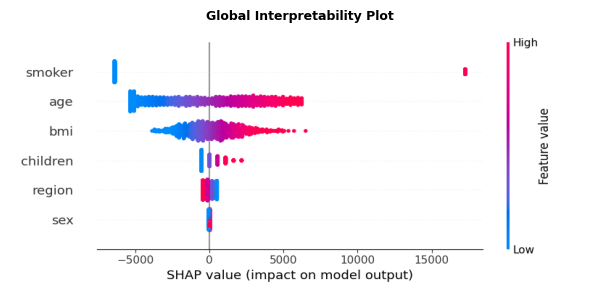

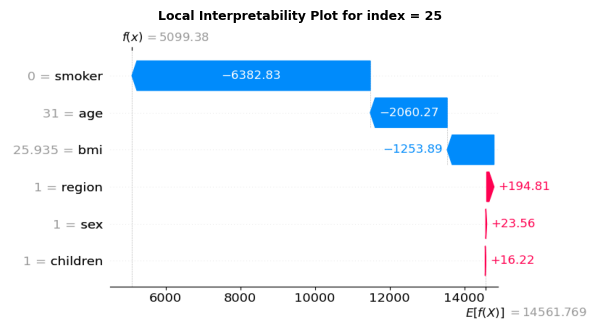

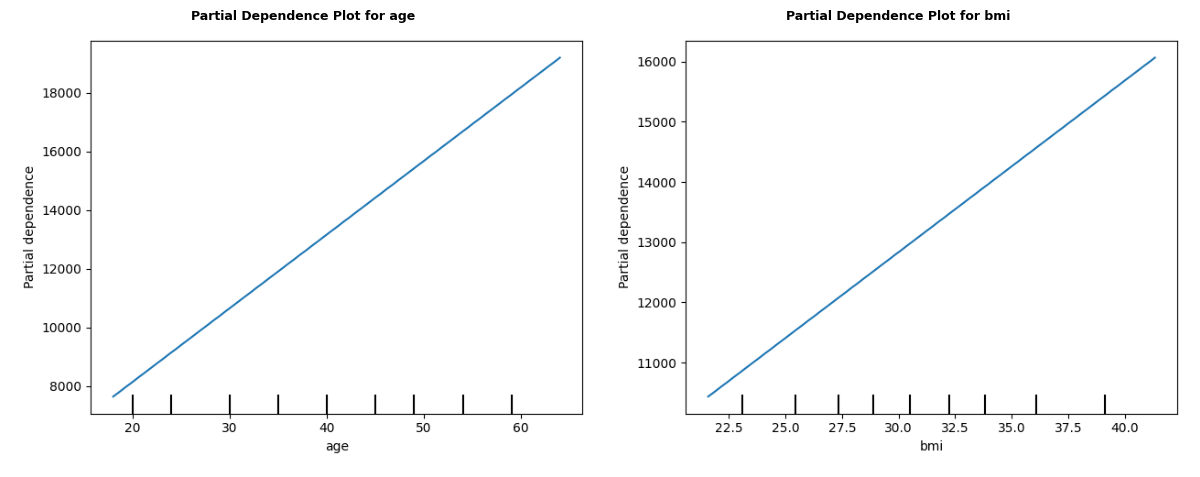

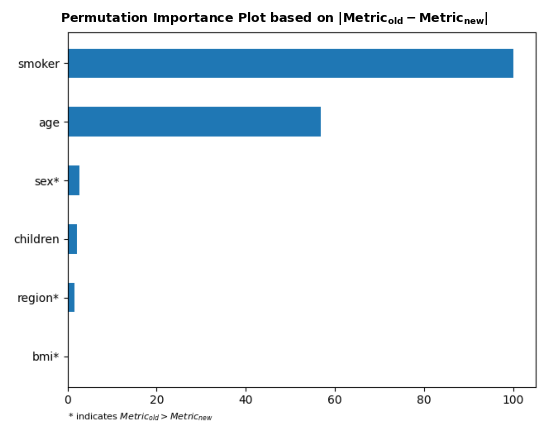

In [12]:
# Run the entire transparency analysis
base_reg_obj.explain()

<h5 align="center">Table 3: Transparency parameters   </h5>

| Var Name    | Description   |  Value        |Default|Compulsory|
| :---        |          ---: |          ---: |---:|---:|
| disable | disable any of the transparency analysis |list of valid inputs ['interpret','partial_dep','perm_imp']  |blank list |No|
| local_row_num |row number for local interpretability plot |integer   |last value of tran_row_num |No|
| model_num   |model for which assessment is required |1 or 2   |last model in model container |No|
| output      |boolean value for displaying the plots |True or False   |True |No|





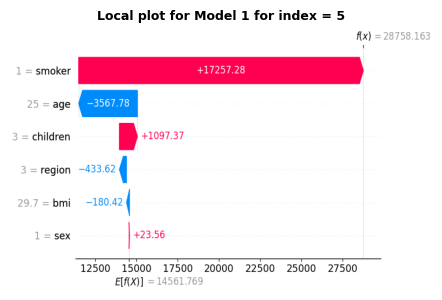

In [13]:
# Get the local interpretability plot for a specific row index
base_reg_obj.explain(local_row_num=5)

   ## Compiling Results 

In [14]:
# Previous Veritas way to compile fairness diagnosis & transparency assessment results
# base_reg_obj.compile()

# We can now assign the output to a variable and convert it into an AI Verify testing output
from aiverify_veritastool.util.aiverify import convert_veritas_artifact_to_aiverify

output = base_reg_obj.compile(save_artifact=False)
convert_veritas_artifact_to_aiverify(model_artifact=output, output_dir="output")

Running evaluate                        done      
     performance measures               done      
     bias detection                     done      
     probability calibration            skipped   
     performance dynamics               skipped   
     individual fairness                skipped   
Running tradeoff                        skipped   
Running feature importance              done      
     leave-one-out analysis             done      
     correlation analysis               done      
Running transparency for model 1        done      
Generating model artifact               

/Users/timlrx/Documents/aiverify/.venv/lib/python3.10/site-packages/aiverify_veritastool/util/aiverify.py:327: UserWarning: ground_truth key is missing
  warnings.warn(f"{key} key is missing")
/Users/timlrx/Documents/aiverify/.venv/lib/python3.10/site-packages/aiverify_veritastool/util/aiverify.py:327: UserWarning: data_path key is missing
  warnings.warn(f"{key} key is missing")
/Users/timlrx/Documents/aiverify/.venv/lib/python3.10/site-packages/aiverify_veritastool/util/aiverify.py:327: UserWarning: ground_truth_path key is missing
  warnings.warn(f"{key} key is missing")
